<a href="https://colab.research.google.com/github/luiseduardoalencar/modelosIA/blob/main/regressao_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ConsumoCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [6]:
motores = df[["ENGINESIZE"]]
co2 = df[["CO2EMISSIONS"]]

motores

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
1062,3.0
1063,3.2
1064,3.0
1065,3.2


#Regressão Linear

In [7]:
x_train, x_test, y_train, y_test = train_test_split(motores,co2, test_size=0.3, random_state=42)

print(motores.iloc[0], co2.iloc[0])

ENGINESIZE    2.0
Name: 0, dtype: float64 CO2EMISSIONS    196
Name: 0, dtype: int64


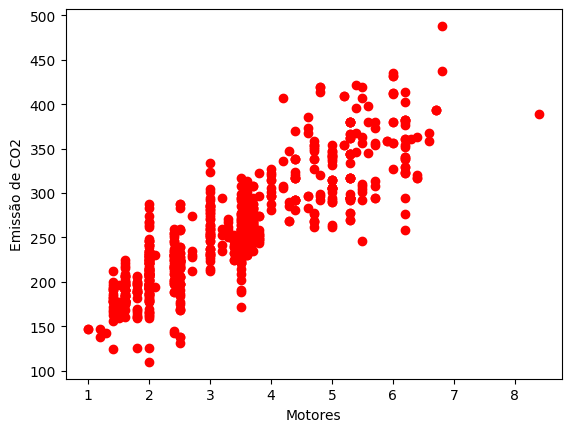

In [8]:
plt.scatter(x_train, y_train, color = "red")
plt.xlabel("Motores")
plt.ylabel("Emissão de CO2")
plt.show()

In [9]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
model.intercept_, model.coef_

(array([126.35436294]), array([[38.98292922]]))

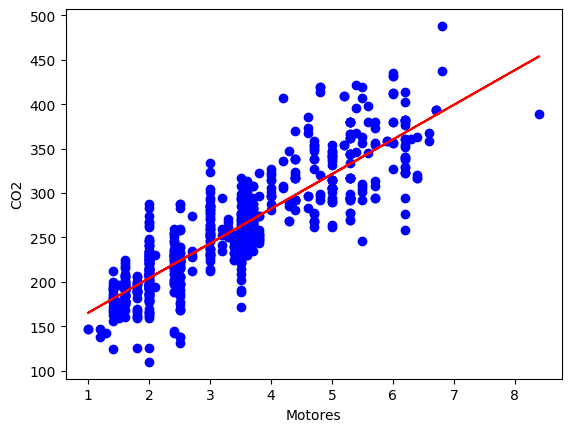

In [10]:
plt.scatter(x_train, y_train, color = "blue")
plt.plot(x_train, model.coef_[0][0]*x_train + model.intercept_[0], "-r")
plt.xlabel("Motores")
plt.ylabel("CO2")
plt.show()

#Agora utilizando o KNN

In [14]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

#Agora realizando testes

In [30]:
y_pred_knn = knn_model.predict(x_test)

In [16]:
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

In [20]:
y_pred_lr = lr_model.predict(x_test)

In [21]:
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

In [27]:
print("KNN:")
print("R²:", r2_knn)
print("MSE:", mse_knn)
print("MAE:", mae_knn)

print("\nRegressão Linear:")
print("R²:", r2_lr)
print("MSE:", mse_lr)
print("MAE:", mae_lr)


KNN:
R²: 0.8024850373385679
MSE: 796.6760124610591
MAE: 21.42367601246106

Regressão Linear:
R²: 0.7758497416185163
MSE: 904.1093982615328
MAE: 23.045310353866185
